<a href="https://colab.research.google.com/github/chirag773/CNN_using_tf_keras/blob/master/Cnn_dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

X = pickle.load(open("X.pickle","rb"))

y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add( Conv2D(64, (3, 3),  input_shape=X.shape[1:]) )
model.add( Activation('relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(64, (3, 3)) )
model.add( Activation('relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)



Train on 22451 samples, validate on 2495 samples
Epoch 1/30
22451/22451 [==============================] - 14s 612us/sample - loss: 0.6781 - acc: 0.5641 - val_loss: 0.6358 - val_acc: 0.6417
Epoch 2/30
22451/22451 [==============================] - 12s 551us/sample - loss: 0.5917 - acc: 0.6916 - val_loss: 0.5267 - val_acc: 0.7283
Epoch 3/30
22451/22451 [==============================] - 13s 561us/sample - loss: 0.4897 - acc: 0.7707 - val_loss: 0.4541 - val_acc: 0.7924
Epoch 4/30
22451/22451 [==============================] - 12s 544us/sample - loss: 0.4337 - acc: 0.8039 - val_loss: 0.4249 - val_acc: 0.8004
Epoch 5/30
22451/22451 [==============================] - 12s 538us/sample - loss: 0.3839 - acc: 0.8294 - val_loss: 0.4031 - val_acc: 0.8172
Epoch 6/30
22451/22451 [==============================] - 12s 539us/sample - loss: 0.3456 - acc: 0.8511 - val_loss: 0.4212 - val_acc: 0.8044
Epoch 7/30
22451/22451 [==============================] - 12s 539us/sample - loss: 0.3050 - acc: 0.8684 -

(183, 275)
[[0.]]
dog


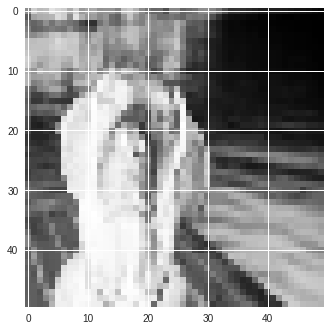

In [140]:
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image


fname = './drive/My Drive/Colab_Notebooks1/image5.jpeg'  # path to current file


image = cv2.imread(fname,cv2.IMREAD_GRAYSCALE) # convert photo into gray scale
print(image.shape)                             # printing current shape
image = cv2.resize(image, (50,50))             # resizing into 50,50
plt.imshow(image)                              # display image
image = image.reshape(1,50,50,1)               # reshaping image into 1,50,50,1
result = model.predict(image)                  
if result[0][0] >= 0.5:
    prediction = 'cat'
else:
     prediction = 'dog'
print(model.predict(image))
print(prediction)


In [0]:
# 